# Nanodegree Machine Learning Engineer
## Capstone Project
## Predicting Rains in Australia

----
## Data Preprocessing

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

data = pd.read_csv("weatherAUS.csv")
data.insert(loc=1, column='Month', value = data['Date'].apply(lambda x: x[5:7])) #create column "Month"
print('Dataset shape:',data.shape)
display(data.head(n=5))

Dataset shape: (142193, 25)


Date Month Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0  2008-12-01    12   Albury     13.4     22.9       0.6          NaN   
1  2008-12-02    12   Albury      7.4     25.1       0.0          NaN   
2  2008-12-03    12   Albury     12.9     25.7       0.0          NaN   
3  2008-12-04    12   Albury      9.2     28.0       0.0          NaN   
4  2008-12-05    12   Albury     17.5     32.3       1.0          NaN   

   Sunshine WindGustDir  WindGustSpeed      ...      Humidity3pm Pressure9am  \
0       NaN           W           44.0      ...             22.0      1007.7   
1       NaN         WNW           44.0      ...             25.0      1010.6   
2       NaN         WSW           46.0      ...             30.0      1007.6   
3       NaN          NE           24.0      ...             16.0      1017.6   
4       NaN           W           41.0      ...             33.0      1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RISK_MM  \
0       1007.1       8.0       NaN     16.9     21.8         No      0.0   
1       1007.8       NaN       NaN     17.2     24.3         No      0.0   
2       1008.7       NaN       2.0     21.0     23.2         No      0.0   
3       1012.8       NaN       NaN     18.1     26.5         No      1.0   
4       1006.0       7.0       8.0     17.8     29.7         No      0.2   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 25 columns]

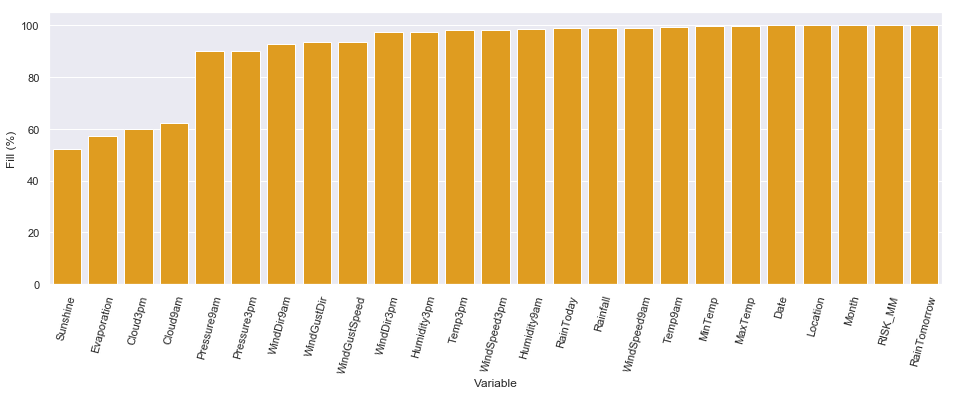

In [3]:
fill = pd.DataFrame(100*data.count().sort_values()/data.shape[0])
fill.reset_index(level=0, inplace=True)
fill.columns = ['Variable','Fill (%)']

sns.set()
plt.figure(figsize=(16, 5))
g = sns.barplot(x = 'Variable', y = 'Fill (%)', data = fill,color = 'orange')
g = plt.xticks(rotation=75)

In [4]:
#The variables Sunshine, Evaporation, Cloud3pm, Cloud9am were removed because they had a low fill percentage
#"Location" was removed, since it was not possible to find on the internet a database with all the latitudes and longitudes of the cities presented in the dataset.
#"Date" was removed, because "Month" and "Season" are going to be used instead.
#"RISK_MM" was removed to avoid data leakage
data = data.drop(columns=['Sunshine','Evaporation','Cloud3pm','Cloud9am','Location','RISK_MM','Date'],axis=1)
data = data.dropna()
print('After Preprocessing Dataset shape is:',data.shape)

After Preprocessing Dataset shape is: (112925, 18)


In [46]:
print('Variable Types')
types = pd.DataFrame(data.dtypes)
types.reset_index(level=0, inplace=True)
types.columns = ['Variable','Type']

numerical_variables = list(types[types['Type'] == 'float64']['Variable'].values)
categorical_variables = list(types[types['Type'] == 'object']['Variable'].values)

Variable Types


In [51]:
categorical_variables

['Month',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

----
## Exploratory Data Analysis

### Implementação: Selecionando Amostras
Para melhor compreensão da clientela e como seus dados vão se transformar no decorrer da análise, é melhor selecionar algumas amostras de dados de pontos e explorá-los com mais detalhes. No bloco de código abaixo, adicione **três** índices de sua escolha para a lista de `indices` que irá representar os clientes que serão acompanhados. Sugerimos que você tente diferentes conjuntos de amostras até obter clientes que variam significativamente entre si.

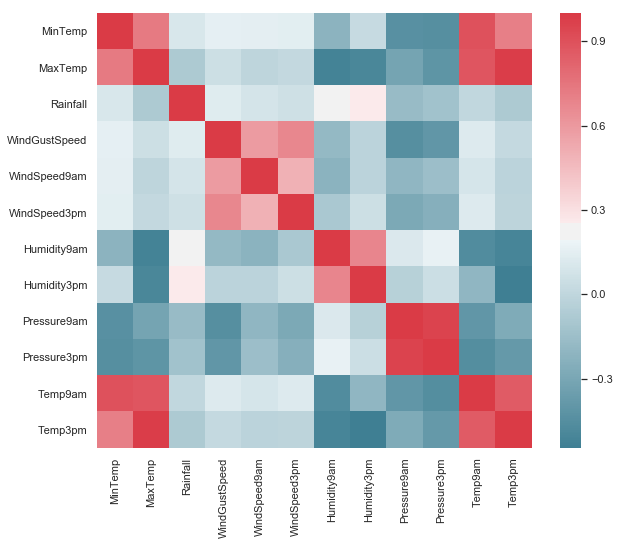

In [27]:
#pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde')
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

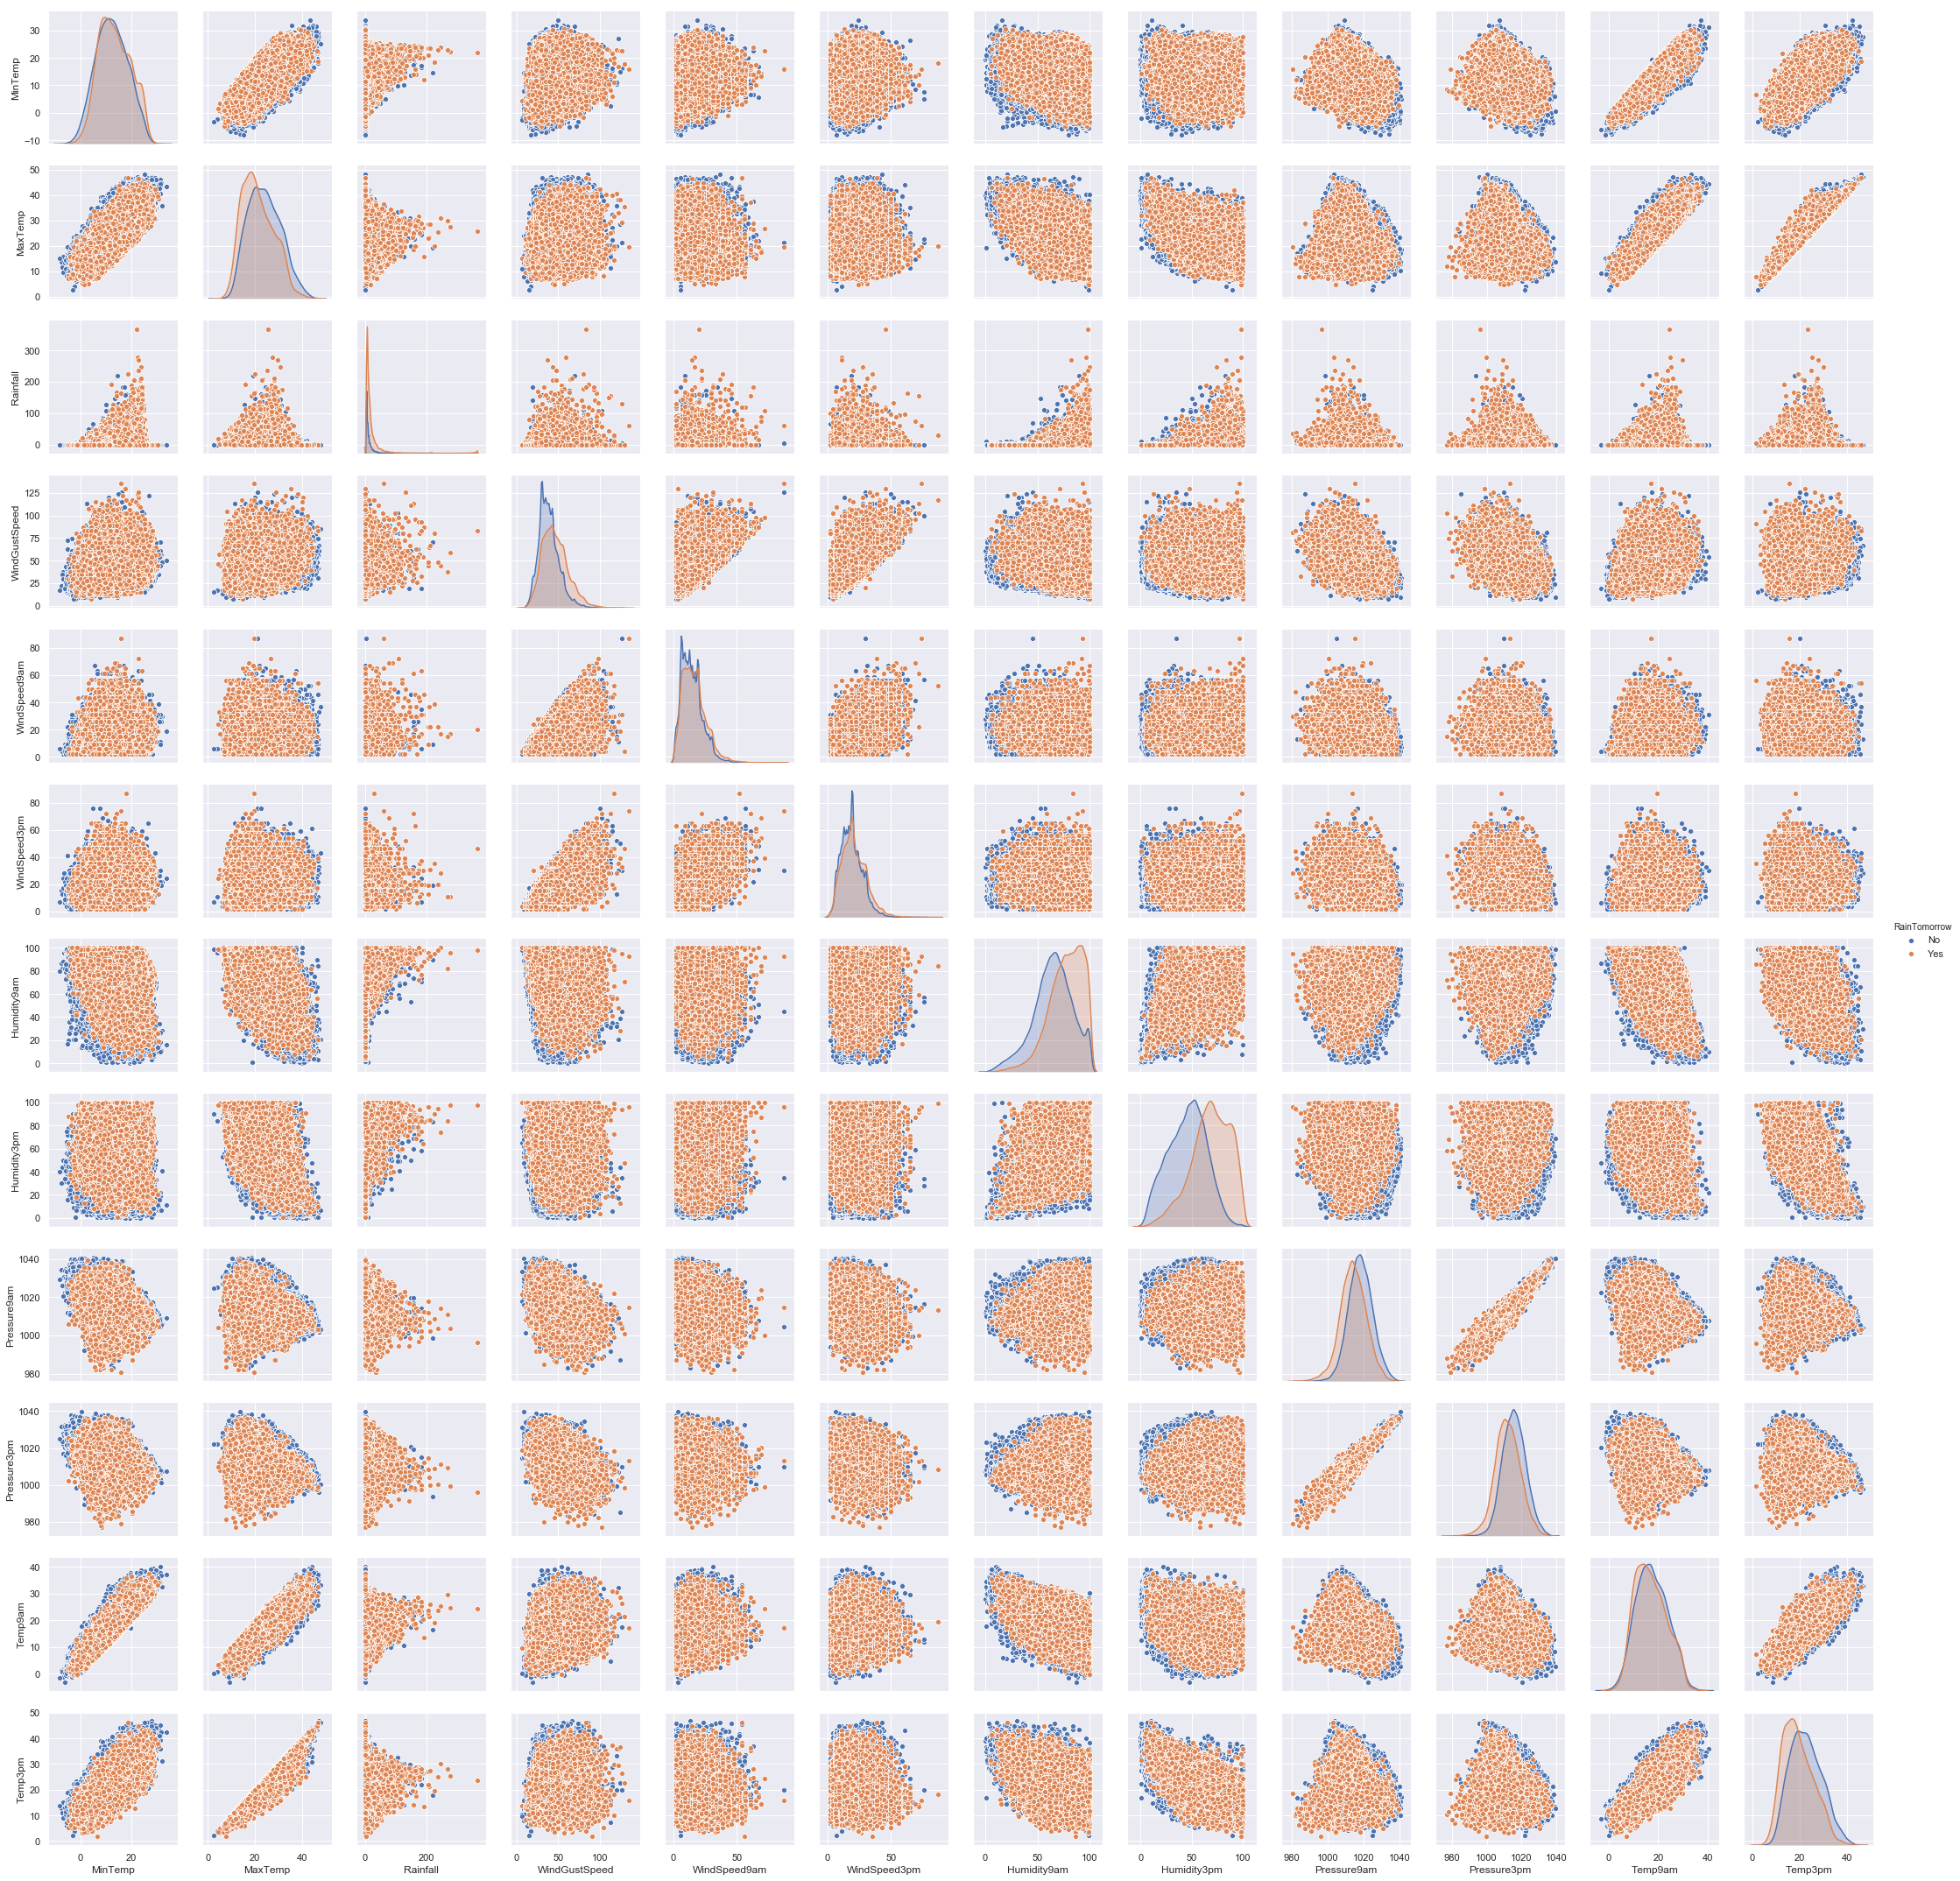

In [52]:
teste = data[numerical_variables+['RainTomorrow']]
sns.pairplot(teste, hue="RainTomorrow")

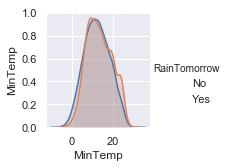

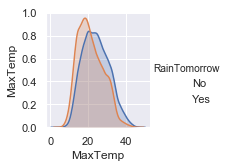

In [54]:
sns.pairplot(data[['MinTemp']+['RainTomorrow']], hue="RainTomorrow")
sns.pairplot(data[['MaxTemp']+['RainTomorrow']], hue="RainTomorrow")

In [3]:
# TODO: Selecione três índices de sua escolha que você gostaria de obter como amostra do conjunto de dados
indices = [183,150,85]

# Crie um DataFrame das amostras escolhidas
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print ("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  36847  43950    20170   36534               239         47943
1  16225   1825     1765     853               170          1067
2  16117  46197    92780    1026             40827          2944

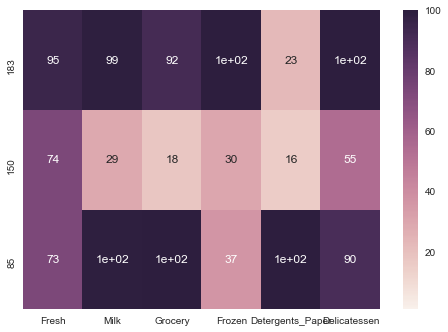

In [11]:
import seaborn as sns

percentis = 100*data.rank(pct=True).round(decimals=3).iloc[indices]
sns.heatmap(percentis, vmin=1, vmax=100, annot=True)

In [10]:
100*data.rank(pct=True).round(decimals=3).iloc[indices]

Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
183   95.2  99.3     91.6    99.8              22.7         100.0
150   73.6  28.9     17.7    30.0              15.5          54.5
85    73.2  99.5    100.0    36.8             100.0          90.0

### Questão 1
Considere que a compra total de cada categoria de produto e a descrição estatística do conjunto de dados abaixo para a sua amostra de clientes.  
 - Que tipo de estabelecimento (de cliente) cada uma das três amostras que você escolheu representa?

**Dica:** Exemplos de estabelecimentos incluem lugares como mercados, cafés e varejistas, entre outros. Evite utilizar nomes para esses padrões, como dizer *"McDonalds"* ao descrever uma amostra de cliente de restaurante.

**Resposta:**

0 - Por apresentar um alto gasto anual em "Fresh Products" (acima de Q3), em "Milk" (bem acima de Q3), em "Grocery" (bem acima de Q3), em "Frozen" (bem acima de Q3) e em Delicatessen (máximo) deve se tratar de uma grande Delicatessen.

1 - Por apresentar um alto gasto anual (próximo a Q3) em "Fresh Products" e baixo no restante (próximo a Q1), deve se tratar de uma feira de frutas e legumes.

2 - Por apresentar um alto gasto anual (máximo) em "Grocery Products", em "Detergent_Paper" (máximo) e em "Milk" (bem acima de Q3), deve se tratar de uma mercearia/supermercado.

### Implementação: Relevância do Atributo
Um pensamento interessante a se considerar é se um (ou mais) das seis categorias de produto são na verdade relevantes para entender a compra do cliente. Dito isso, é possível determinar se o cliente que comprou certa quantidade de uma categoria de produto vai necessariamente comprar outra quantidade proporcional de outra categoria de produtos? Nós podemos determinar facilmente ao treinar uma aprendizagem não supervisionada de regressão em um conjunto de dados com um atributo removido e então pontuar quão bem o modelo pode prever o atributo removido.

No bloco de código abaixo, você precisará implementar o seguinte:
 - Atribuir `new_data` a uma cópia dos dados ao remover o atributo da sua escolha utilizando a função `DataFrame.drop`.
 - Utilizar `sklearn.cross_validation.train_test_split` para dividir o conjunto de dados em conjuntos de treinamento e teste.
   - Utilizar o atributo removido como seu rótulo alvo. Estabelecer um `test_size` de `0.25` e estebeleça um `random_state`.
 - Importar uma árvore de decisão regressora, estabelecer um `random_state` e ajustar o aprendiz nos dados de treinamento.
 - Reportar a pontuação da previsão do conjunto de teste utilizando a função regressora `score`.

In [25]:
# TODO: Fazer uma cópia do DataFrame utilizando a função 'drop' para soltar o atributo dado
new_data = pd.read_csv("customers.csv")
new_data = new_data.drop(['Region', 'Channel'], axis = 1)

for variavel in list(data.columns):
    new_data = pd.read_csv("customers.csv")
    y = new_data[variavel]
    new_data = new_data.drop([variavel], axis = 1)

    # TODO: Dividir os dados em conjuntos de treinamento e teste utilizando o atributo dado como o alvo
    from sklearn.cross_validation import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(new_data, y, test_size = 0.25, random_state = 1)

    # TODO: Criar um árvore de decisão regressora e ajustá-la ao conjunto de treinamento
    from sklearn.tree import DecisionTreeRegressor
    regressor = DecisionTreeRegressor(random_state=0)
    regressor.fit(X_train,y_train)
    y_pred = regressor.predict(X_test)

    # TODO: Reportar a pontuação da previsão utilizando o conjunto de teste
    from sklearn.metrics import r2_score
    score = r2_score(y_test, y_pred)
    print('R2 score for {} as dependent variable: {}'.format(variavel, score))

R2 score for Fresh as dependent variable: -0.7041649844848801
R2 score for Milk as dependent variable: 0.480997873350531
R2 score for Grocery as dependent variable: 0.7982516488492764
R2 score for Frozen as dependent variable: -0.9978376669268478
R2 score for Detergents_Paper as dependent variable: 0.7859720374652686
R2 score for Delicatessen as dependent variable: -1.4273962614730928


### Questão 2
- Qual atributo você tentou prever?
- Qual foi a pontuação da previsão reportada?
- Esse atributo é necessário para identificar os hábitos de compra dos clientes?

**Dica:** O coeficiente de determinação, `R^2`, é pontuado entre 0 e 1, sendo 1 o ajuste perfeito. Um `R^2` negativo indica que o modelo falhou em ajustar os dados. Se você obter um score baixo para um atributo em particular, isso nos faz acreditar que aquele ponto de atributo é difícil de ser previsto utilizando outros atributos, sendo assim um atributo importante quando considerarmos a relevância.

**Resposta:**

A retirada tanto de "Grocery", como de "Detergents_Paper", chegou-se a um alto valor de R². proximo a 0.8. Dessa forma, esses atributos podem ser removido da análise sem grandes perdas de dados.

Vale destacar também "Milk", cuja retirada levou a um R² positivo de 0.5.

### Visualizando a Distribuição de Atributos
Para entender melhor o conjunto de dados, você pode construir uma matriz de dispersão de cada um dos seis atributos dos produtos presentes nos dados. Se você perceber que o atributo que você tentou prever acima é relevante para identificar um cliente específico, então a matriz de dispersão abaixo pode não mostrar nenhuma relação entre o atributo e os outros. Da mesma forma, se você acredita que o atributo não é relevante para identificar um cliente específico, a matriz de dispersão pode mostrar uma relação entre aquele e outros atributos dos dados. Execute o bloco de código abaixo para produzir uma matriz de dispersão.

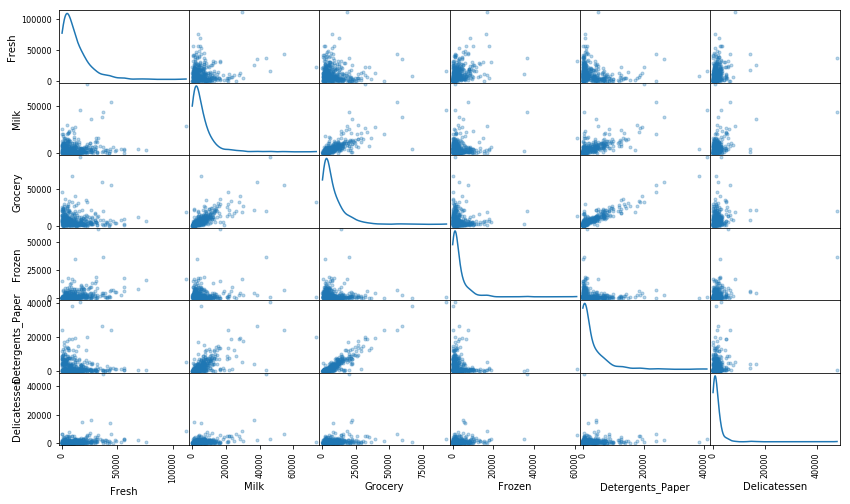

In [5]:
# Produza uma matriz de dispersão para cada um dos pares de atributos dos dados
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [6]:
corr = data.corr(method='pearson', min_periods=1)
corr

Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
Fresh             1.000000  0.100510 -0.011854  0.345881         -0.101953   
Milk              0.100510  1.000000  0.728335  0.123994          0.661816   
Grocery          -0.011854  0.728335  1.000000 -0.040193          0.924641   
Frozen            0.345881  0.123994 -0.040193  1.000000         -0.131525   
Detergents_Paper -0.101953  0.661816  0.924641 -0.131525          1.000000   
Delicatessen      0.244690  0.406368  0.205497  0.390947          0.069291   

                  Delicatessen  
Fresh                 0.244690  
Milk                  0.406368  
Grocery               0.205497  
Frozen                0.390947  
Detergents_Paper      0.069291  
Delicatessen          1.000000

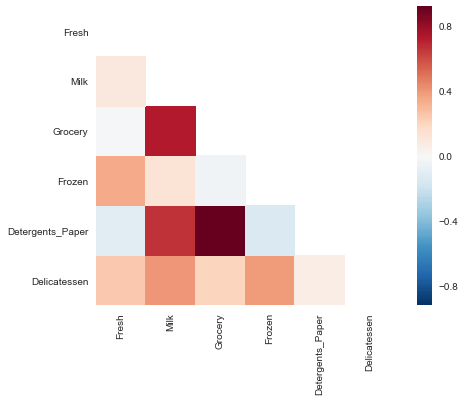

In [7]:
import seaborn as sns
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax= 0.92, square=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000009619CCCBA8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000096198CF3C8>]], dtype=object)

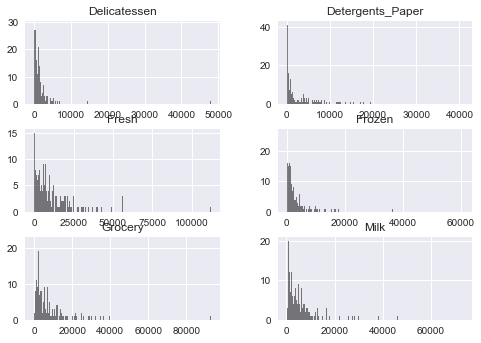

In [8]:
data.hist(color='k', alpha=0.5, bins=500)

C:\Users\Fred Dias\Anaconda\lib\site-packages\seaborn\categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


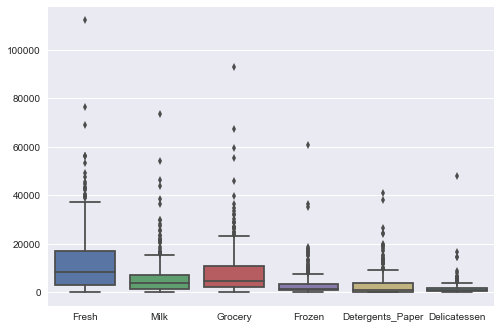

In [47]:
import seaborn as sns

sns.boxplot(data, vert = True)
#data['Milk'].plot.box()

### Questão 3:

- Usando a matriz de dispersão como referência, discuta a distribuição da base de dados. Elabore sua resposta considerando a normalidade, _outliers_, a grande quantidade de pontos próximo de 0 e outras coisas que julgar importante. Se necessário, você pode realizar outros plots para complementar sua explicação.
- Há algum par de atributos que mostra algum grau de correlação?
- Como isso confirma ou nega a suspeita sobre relevância do atributo que você tentou prever?
- Como os dados desses atributos são distribuidos?

**Dica:** Os dados são distribuídos normalmente? Onde a maioria dos pontos estão? Você pode usar [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) para ver a correlação dos atributos e visualiza-los utilizando um [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(os dados que alimentam o heatmap seriam as correlações, por exemplo `data.corr()`)

**Resposta:**

Nota-se que todas as seis variáveis apresentam um número considerável de outliers (ver bloxplots). Além disso, a partir da visualização dos histogramas, verifica-se que há uma alta quantidade de pontos próximos a zero e os dados são distribuídos de maneira "left-skewed", logo não seguem uma distribuição normal.

Quanto às correlações, há uma correlação muito forte entre "Grocery"e "Detergents_paper", uma correlação forte entre "Grocery" e "Milk" e uma correlação moderada entre "Milk" e "Detergents_paper". Tais correlações confirmam que a retirada "Grocery" é coerente, já que pode ser explicada.

## Pré-processamento de Dados
Nesta seção, você irá pré-processar os dados para criar uma melhor representação dos clientes ao executar um escalonamento dos dados e detectando os discrepantes. Pré-processar os dados é geralmente um passo fundamental para assegurar que os resultados obtidos na análise são importantes e significativos.

### Implementação: Escalonando Atributos
Se os dados não são distribuídos normalmente, especialmente se a média e a mediana variam significativamente (indicando um grande desvio), é quase sempre [apropriado](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) aplicar um escalonamento não linear – particularmente para dados financeiros. Uma maneira de conseguir escalonar dessa forma é utilizando o [ teste Box-Cox](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), que calcula o melhor poder de transformação dos dados, que reduzem o desvio. Uma abordagem simplificada que pode funcionar na maioria dos casos seria aplicar o algoritmo natural.

No bloco de código abaixo, você vai precisar implementar o seguinte:
 - Atribua uma cópia dos dados para o `log_data` depois de aplicar um algoritmo de escalonamento. Utilize a função `np.log` para isso.
 - Atribua uma cópia da amostra do dados para o `log_samples` depois de aplicar um algoritmo de escalonamento. Novamente, utilize o `np.log`.

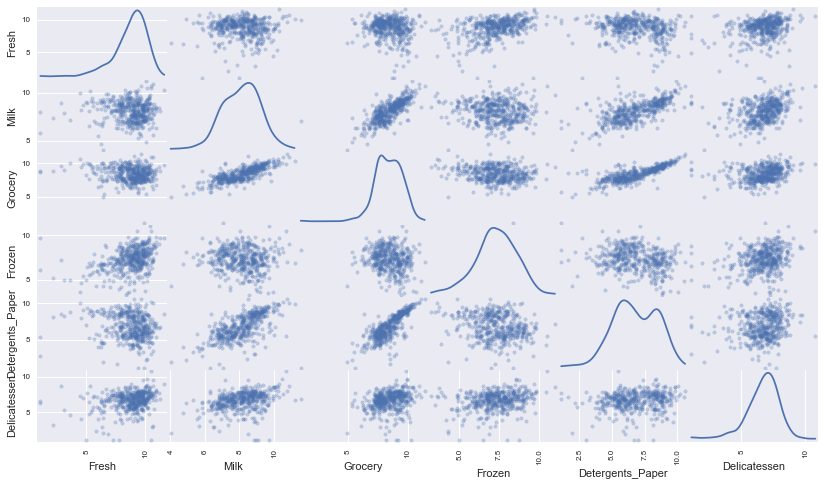

In [26]:
# TODO: Escalone os dados utilizando o algoritmo natural
log_data = np.log(data)

# TODO: Escalone a amostra de dados utilizando o algoritmo natural
log_samples = np.log(data.sample(n=100))

# Produza uma matriz de dispersão para cada par de atributos novos-transformados
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observação
Após aplicar o algoritmo natural para o escalonamento dos dados, a distribuição para cada atributo deve parecer mais normalizado. Para muitos pares de atributos, você vai precisar identificar anteriormente como sendo correlacionados, observe aqui se essa correlação ainda está presente (e se está mais forte ou mais fraca que antes).

Execute o código abaixo para ver como a amostra de dados mudou depois do algoritmo natural ter sido aplicado a ela.

In [10]:
# Mostre a amostra dados log-transformada
display(log_samples)

Fresh       Milk    Grocery     Frozen  Detergents_Paper  \
337   9.143239   7.205635   7.867489   9.008224          6.091310   
12   10.364514   9.418898   9.372204   5.659482          8.263848   
231   7.759614   9.275941   8.250098   7.271704          7.356280   
106   7.282074   8.754161   9.278373   4.890349          8.829080   
409   9.071997   8.198089   8.716044   7.761745          7.660585   
2     8.756682   9.083416   8.946896   7.785305          8.165079   
220   9.599337   6.801283   7.231287   7.475906          4.025352   
212   8.894396   6.919684   7.631432   7.163172          5.480639   
274   6.795706   7.440147   7.518064   6.612041          6.632002   
390   8.117312   7.074117   7.191429   8.612867          5.739793   
111   9.439784   9.315961   9.773891   6.690842          8.772920   
221   8.593413   8.923058   9.272940   4.510860          8.334952   
98    6.220590   4.718499   6.656727   6.796824          4.025352   
204   7.578657   6.792344   8.561401   7.232010          1.609438   
21    8.624612   6.769642   7.605890   8.126518          5.926926   
158   7.958926   8.790269   9.171392   6.835185          8.295049   
332  10.013283   8.075894   7.277248   7.699842          5.181784   
205   7.009409   9.368284  10.068832   6.861711          9.133999   
278   9.366746   7.748029   7.841100   8.673342          5.613128   
408   9.018817   8.263590   8.765146   7.406103          7.912057   
314   9.270212   7.492760   8.942069   7.301822          6.753438   
34    7.314553   7.590347   7.724005   6.052089          6.180017   
127   9.974179   8.887791   9.276596   6.779922          7.777374   
421   9.744668   8.486115   9.110851   6.938284          8.135933   
17    8.678632   8.725345   7.983781   6.732211          5.913503   
161   9.428190   6.291569   5.645447   6.995766          1.098612   
146   8.957897   7.568379   7.685703   6.830874          4.290459   
24   10.027783   9.187686   9.531844   7.977625          8.407825   
159   5.872118   8.949495   9.594378   5.986452          8.996776   
184   5.789960   6.822197   8.457443   4.304065          5.811141   
..         ...        ...        ...        ...               ...   
150   9.694309   7.509335   7.475906   6.748760          5.135798   
56    8.318254  10.305346  10.198617   7.869402          9.783577   
439   7.932721   7.437206   7.828038   4.174387          6.167516   
267   9.947169   7.108244   7.853993   8.287780          6.602588   
358   6.632002   9.834352   7.414573   8.718337          6.284134   
124  10.492662   7.403670   7.993282   8.473659          6.214608   
103  10.934570   8.161660   9.094480   9.799681          7.299797   
151   7.161622   8.110127   7.611842   6.274762          5.541264   
378   8.078688   8.099858   7.550661   5.641907          4.219508   
428   8.021913   8.694502   8.499029   7.695303          6.745236   
172   6.861711   8.608678   8.785081   5.808142          7.951559   
189   6.726233   9.356776   9.352014   5.616771          8.300777   
438   9.238928   7.591357   7.710653   6.945051          5.123964   
310   8.858511   7.307873   7.785305   9.438989          5.700444   
93    9.333796   8.035926   7.631432  10.463360          4.262680   
91    9.453600   7.923710   7.835975   9.070273          6.440947   
219   8.332068   5.905362   7.237059   7.743270          4.454347   
265   8.684232  10.065904   9.525078   9.225721          6.721426   
403  10.150582   9.306196   8.434681   4.844187          6.448889   
77    9.409601   9.449121  10.259062   6.767343          9.395491   
114   9.800568   6.984716   7.600902   7.845808          4.770685   
304   5.081404   8.917311  10.117510   6.424869          9.374413   
152   9.843738   7.223296   8.050384   8.006701          5.863631   
237   9.835851   8.252707   6.385194   8.441176          3.332205   
31    7.867871   8.375399   8.049746   7.643962          6.709304   
420   8.402007   8.569026   9.490015   3.218876          8.827321   
355   5

### Implementação: Detecção de valores atípicos (_Outlier_)
Identificar dados discrepantes é extremamente importante no passo de pré-processamento de dados de qualquer análise. A presença de discrepantes podem enviesar resultados que levam em consideração os pontos de dados. Há muitas "regras básicas" que constituem um discrepante em um conjunto de dados. Aqui usaremos [o Método Turco para identificar valores atípicos](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): Um *passo do discrepante* é calculado 1,5 vezes a variação interquartil (IQR). Um ponto de dados com um atributo que está além de um passo de um discrepante do IQR para aquele atributo, ele é considerado anormal.

No bloco de código abaixo, você vai precisar implementar o seguinte:
 - Atribuir o valor do 25º percentil do atributo dado para o `Q1`. Utilizar `np.percentile` para isso.
 - Atribuir o valor do 75º percentil do atributo dado para o `Q3`. Novamente, utilizar `np.percentile`.
 - Atribuir o cálculo de um passo do discrepante do atributo dado para o `step`.
 - Remover opcionalmentos os pontos de dados do conjunto de dados ao adicionar índices à lista de `outliers`.

**NOTA:** Se você escolheu remover qualquer discrepante, tenha certeza que a amostra de dados não contém nenhum desses pontos!  
 Uma vez que você executou essa implementação, o conjunto de dado será armazenado na variável `good_data`!

In [32]:
feature = 'Milk'
Q1 = np.percentile(log_data[feature], 25)

# TODO: Calcule Q3 (75º percentil dos dados) para o atributo dado
Q3 = np.percentile(log_data[feature], 75)

# TODO: Utilize a amplitude interquartil para calcular o passo do discrepante (1,5 vezes a variação interquartil)
step = 1.5*(Q3-Q1)

# Mostre os discrepantes
print ("Data points considered outliers for the feature '{}':".format(feature))
#display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
df_temp  = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
list(df_temp.index)

Data points considered outliers for the feature 'Milk':


[86, 98, 154, 356]

In [74]:
import itertools
import numpy as np
# Para cada atributo encontre os pontos de dados com máximos valores altos e baixos
l = np.array([])
for feature in log_data.keys():
    
    # TODO: Calcule Q1 (25º percentil dos dados) para o atributo dado
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calcule Q3 (75º percentil dos dados) para o atributo dado
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Utilize a amplitude interquartil para calcular o passo do discrepante (1,5 vezes a variação interquartil)
    step = 1.5*(Q3-Q1)
    
    # Mostre os discrepantes
    print ("Data points considered outliers for the feature '{}':".format(feature))
    df_temp  = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display(df_temp)
    l_temp = df_temp.index.values
    l = np.append(l,l_temp)
    
    
# OPCIONAL: Selecione os índices dos pontos de dados que você deseja remover
outliers_unique, counts  = np.unique(l,return_counts=True)
outliers_dup = outliers_unique[counts > 1]

# Remova os valores atí, caso nenhum tenha sido especificado
good_data = log_data.drop(log_data.index[list(outliers_dup)]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
65   4.442651   9.950323  10.732651  3.583519         10.095388      7.260523
66   2.197225   7.335634   8.911530  5.164786          8.151333      3.295837
81   5.389072   9.163249   9.575192  5.645447          8.964184      5.049856
95   1.098612   7.979339   8.740657  6.086775          5.407172      6.563856
96   3.135494   7.869402   9.001839  4.976734          8.262043      5.379897
128  4.941642   9.087834   8.248791  4.955827          6.967909      1.098612
171  5.298317  10.160530   9.894245  6.478510          9.079434      8.740337
193  5.192957   8.156223   9.917982  6.865891          8.633731      6.501290
218  2.890372   8.923191   9.629380  7.158514          8.475746      8.759669
304  5.081404   8.917311  10.117510  6.424869          9.374413      7.787382
305  5.493061   9.468001   9.088399  6.683361          8.271037      5.351858
338  1.098612   5.808142   8.856661  9.655090          2.708050      6.309918
353  4.762174   8.742574   9.961898  5.429346          9.069007      7.013016
355  5.247024   6.588926   7.606885  5.501258          5.214936      4.844187
357  3.610918   7.150701  10.011086  4.919981          8.816853      4.700480
412  4.574711   8.190077   9.425452  4.584967          7.996317      4.127134

Data points considered outliers for the feature 'Milk':


Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
86   10.039983  11.205013  10.377047  6.894670          9.906981      6.805723
98    6.220590   4.718499   6.656727  6.796824          4.025352      4.882802
154   6.432940   4.007333   4.919981  4.317488          1.945910      2.079442
356  10.029503   4.897840   5.384495  8.057377          2.197225      6.306275

Data points considered outliers for the feature 'Grocery':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
75   9.923192  7.036148  1.098612  8.390949          1.098612      6.882437
154  6.432940  4.007333  4.919981  4.317488          1.945910      2.079442

Data points considered outliers for the feature 'Frozen':


Fresh      Milk    Grocery     Frozen  Detergents_Paper  Delicatessen
38    8.431853  9.663261   9.723703   3.496508          8.847360      6.070738
57    8.597297  9.203618   9.257892   3.637586          8.932213      7.156177
65    4.442651  9.950323  10.732651   3.583519         10.095388      7.260523
145  10.000569  9.034080  10.457143   3.737670          9.440738      8.396155
175   7.759187  8.967632   9.382106   3.951244          8.341887      7.436617
264   6.978214  9.177714   9.645041   4.110874          8.696176      7.142827
325  10.395650  9.728181   9.519735  11.016479          7.148346      8.632128
420   8.402007  8.569026   9.490015   3.218876          8.827321      7.239215
429   9.060331  7.467371   8.183118   3.850148          4.430817      7.824446
439   7.932721  7.437206   7.828038   4.174387          6.167516      3.951244

Data points considered outliers for the feature 'Detergents_Paper':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
75   9.923192  7.036148  1.098612  8.390949          1.098612      6.882437
161  9.428190  6.291569  5.645447  6.995766          1.098612      7.711101

Data points considered outliers for the feature 'Delicatessen':


Fresh       Milk    Grocery     Frozen  Detergents_Paper  \
66    2.197225   7.335634   8.911530   5.164786          8.151333   
109   7.248504   9.724899  10.274568   6.511745          6.728629   
128   4.941642   9.087834   8.248791   4.955827          6.967909   
137   8.034955   8.997147   9.021840   6.493754          6.580639   
142  10.519646   8.875147   9.018332   8.004700          2.995732   
154   6.432940   4.007333   4.919981   4.317488          1.945910   
183  10.514529  10.690808   9.911952  10.505999          5.476464   
184   5.789960   6.822197   8.457443   4.304065          5.811141   
187   7.798933   8.987447   9.192075   8.743372          8.148735   
203   6.368187   6.529419   7.703459   6.150603          6.860664   
233   6.871091   8.513988   8.106515   6.842683          6.013715   
285  10.602965   6.461468   8.188689   6.948897          6.077642   
289  10.663966   5.655992   6.154858   7.235619          3.465736   
343   7.431892   8.848509  10.177932   7.283448          9.646593   

     Delicatessen  
66       3.295837  
109      1.098612  
128      1.098612  
137      3.583519  
142      1.098612  
154      2.079442  
183     10.777768  
184      2.397895  
187      1.098612  
203      2.890372  
233      1.945910  
285      2.890372  
289      3.091042  
343      3.610918

C:\Users\Fred Dias\Anaconda\lib\site-packages\pandas\indexes\base.py:1434: VisibleDeprecationWarning: non integer (and non boolean) array-likes will not be accepted as indices in the future
  result = getitem(key)


### Questão 4
- Há alguns pontos de dado considerados discrepantes de mais de um atributo baseado na definição acima?
- Esses pontos de dados deveriam ser removidos do conjunto?
- Se qualquer ponto de dados foi adicionado na lista `outliers` para ser removido, explique por quê.

**Resposta:**

Seguindo o critério adotado, 42 pontos foram identificados como outliers, sendo 5 pontos aparecendo como outliers em mais de uma variável. Dessa forma, retiramos esses pontos, já que não representam um comportamento geral dos clientes.

## Transformação de Atributo
Nesta seção, você irá utilizar a análise de componentes principais (PCA) para elaborar conclusões sobre a estrutura subjacente de dados de clientes do atacado. Dado que ao utilizar a PCA em conjunto de dados calcula as dimensões que melhor maximizam a variância, nós iremos encontrar quais combinações de componentes de atributos melhor descrevem os consumidores.

### Implementação: PCA

Agora que os dados foram escalonados em uma distribuição normal e qualquer discrepante necessário foi removido, podemos aplicar a PCA na `good_data` para descobrir qual dimensão dos dados melhor maximizam a variância dos atributos envolvidos. Além de descobrir essas dimensões, a PCA também irá reportar a *razão da variância explicada* de cada dimensão – quanta variância dentro dos dados é explicada pela dimensão sozinha. Note que o componente (dimensão) da PCA pode ser considerado como um novo "feature" do espaço, entretanto, ele é uma composição do atributo original presente nos dados.

No bloco de código abaixo, você vai precisar implementar o seguinte:
 - Importar o `sklearn.decomposition.PCA` e atribuir os resultados de ajuste da PCA em seis dimensões com o `good_data` para o `pca`.
 - Aplicar a transformação da PCA na amostra de log-data `log_samples` utilizando `pca.transform`, e atribuir os resultados para o `pca_samples`.

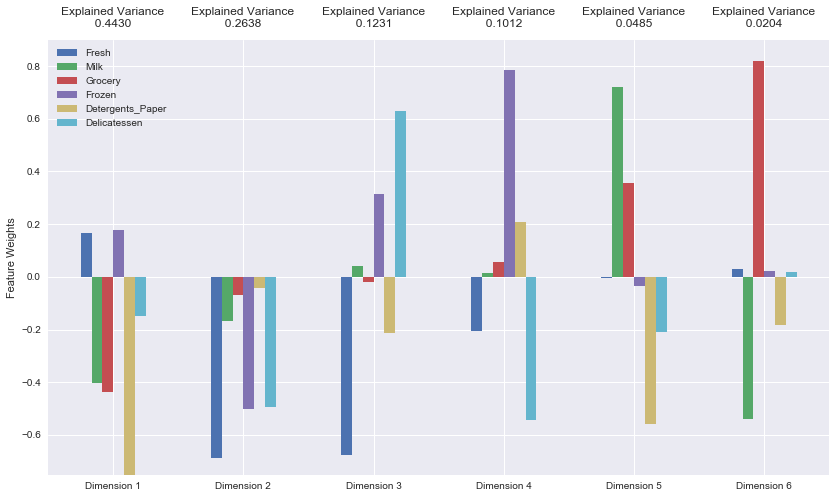

In [75]:
# TODO: Aplique a PCA ao ajustar os bons dados com o mesmo número de dimensões como atributos
from sklearn.decomposition import PCA
pca = PCA(n_components = 6)
pca.fit(good_data)

# TODO: Transforme a amostra de data-log utilizando o ajuste da PCA acima
pca_samples = pca.transform(log_samples)

# Gere o ptlot dos resultados da PCA
pca_results = vs.pca_results(good_data, pca)

### Questão 5
- Quanta variância nos dados é explicada **no total** pelo primeiro e segundo componente principal?
- Quanta variância nos dados é explicada pelos quatro primeiros componentes principais?
- Utilizando a visualização fornecida acima, discuta quais das quatro primeiras dimensões que melhor representam em termos de despesas dos clientes. Explique qual das quatro representa melhor em termos de consumo dos clientes.

**Dica:** Uma melhora positiva dentro de uma dimensão específica corresponde a uma *melhora* do atributos de *pesos-positivos* e uma *piora* dos atributos de *pesos-negativos*. A razão de melhora ou piora é baseada nos pesos de atributos individuais.

**Resposta:**

Cerca de 71% da variância total é explicada pelos 2 primeiros componentes principais e cerca de 93% é explicada pelos 4 primeiros.

A primeira dimensão apresenta como atributos de maior peso "Milk", "Grocery" e "Detergents_paper", justamente as 3 variáveis que se destacaram como maior correlação entre si. Nas dimensões seguintes (2ª, 3ª e 4ª), tais variáveis apresentam menor peso e as outras ganham maior importância ("Fresh", "Frozen" e "Delicatessen"). Assim, pode-se concluir que a primeira dimensão representa esses 3 parâmetros.

Na segunda dimensão, destacam-se "Fresh", "Frozen" e "Delicatessen". A matriz de correlação plotada anteriormente mostra que, logo após as correlações mais altas entre "Milk", "Grocery" e "Detergents_paper", estão as correlações entre "Delicatessen-Frozen" e "Fresh-Frozen", em torno de 0.4.

Na terceira dimensão, um aumento desta está relacionado a um aumento em "Delicatessen" e a uma redução em "Fresh". 

Por fim, na quarta dimensão, predominam, "Frozen" e "Delicatessen". Um aumento desta está conectado a uma queda em "Delicatessen" e um aumento em "Frozen".

### Observação
Execute o código abaixo para ver como a amostra de log transformado mudou depois de receber a transformação da PCA aplicada a ele em seis dimensões. Observe o valor numérico para as quatro primeiras dimensões para os pontos da amostra. Considere se isso for consistente com sua interpretação inicial dos pontos da amostra.

In [76]:
pca_results.index.values

array(['Dimension 1', 'Dimension 2', 'Dimension 3', 'Dimension 4',
       'Dimension 5', 'Dimension 6'], dtype=object)

In [77]:
# Exiba a amostra de log-data depois de aplicada a tranformação da PCA
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

Dimension 1  Dimension 2  Dimension 3  Dimension 4  Dimension 5  \
0       -1.7580       0.0097      -0.9590      -1.6824       0.2680   
1        0.2982       2.1375      -0.5634       0.8431      -2.6479   
2       -0.2672       0.0434      -1.0736      -0.1957      -0.8635   
3        3.2335       0.5493      -1.1499      -2.2714       3.0208   
4        1.1553      -1.4052       0.5422       0.4127      -0.6865   
5       -1.7796      -0.0874      -0.3768      -0.1419      -0.4625   
6       -4.0696       1.2724      -0.7043      -0.6909       0.4749   
7        1.2369       0.3496       0.1058      -0.9410      -0.5681   
8        0.8986       3.8818      -1.6638       2.4046       1.6042   
9       -1.0865      -2.0344       1.6738       0.7621       1.4379   
10       1.3851      -0.7802      -0.6023      -0.0495      -0.6376   
11      -2.6392      -1.1158      -0.1614       0.5671      -0.1916   
12      -2.8734      -0.6774       0.1330      -0.1802      -0.0250   
13       0.6448      -2.8583       0.6377       0.5879       1.9515   
14      -2.8096      -3.6459       1.0567      -0.5186       0.6999   
15      -0.1126      -1.8858       0.5508       0.4506      -0.1517   
16      -1.2292       1.5540      -3.2462       0.0043       0.1124   
17       0.7938      -2.8923      -0.0542      -0.1601      -0.3043   
18      -2.0740      -1.5983      -0.0683       0.4013      -0.0483   
19      -0.8957      -1.0542      -1.5162      -1.2133      -0.4758   
20       1.6691      -0.3980       0.5161      -1.3189       0.0913   
21       0.0724      -1.8983      -1.2181       0.1449       0.3574   
22      -0.4766       1.0323       1.4615      -0.3877      -0.0546   
23       0.3788      -1.2042      -0.4336       0.6676       0.0871   
24      -0.6435       6.4218      -1.6655       1.9916       1.7796   
25      -3.4013      -1.0179       0.4117       1.0334      -0.0950   
26       0.7442      -0.3275      -0.3283       1.5913      -0.0591   
27       1.4340       0.9779      -0.3710      -1.2233      -0.2404   
28       0.5684      -1.0850      -1.4044      -0.5784      -0.6738   
29      -3.1837      -0.0344      -0.6155       0.2331      -0.0430   
..          ...          ...          ...          ...          ...   
70       1.5715       0.6914       0.7154      -0.0264       0.0495   
71       1.8415      -0.6217       0.6492       0.7504      -0.5338   
72      -3.2463       1.6927       0.9803       0.7949      -0.1914   
73      -2.3266       0.6975       0.1123       0.2709      -0.2469   
74      -0.2111      -1.6998       0.8104       1.4239      -0.0610   
75      -0.8395       0.1167      -0.9179       0.7275      -0.2404   
76       1.9883       0.5442      -1.0348       0.7146      -0.1285   
77      -1.3392      -0.9169      -0.0080       0.9980      -0.3601   
78      -0.1848      -0.7869       0.0150       1.0044      -1.5881   
79      -0.8375      -1.0765      -0.3684      -0.8111      -0.5111   
80       1.6063      -0.6751       0.4544       0.1091       0.3745   
81      -0.9128       0.0198      -1.4805       1.3307       0.9609   
82       1.5763       0.4848      -0.3596       0.4615      -0.9630   
83       1.0120      -0.0103      -0.7516      -0.0545      -0.4333   
84      -0.4191      -0.4595      -1.0590      -0.2384      -0.2853   
85       1.3537      -0.0379       0.4107       0.1730       0.6837   
86      -1.8714       7.3099       1.3065       1.7873      -0.3650   
87      -2.4827       0.2804      -0.2692       0.2011       0.1787   
88      -2.0887      -0.7006       0.8537       1.0105      -0.5587   
89       1.3534       0.3767      -0.9679       0.3416       0.5273   
90       0.3731      -2.3793      -0.6221       0.3880      -0.1739   
91       0.6319       0.9975       1.5335       0.2165       0.3477   
92       0.1922      -1.6200      -0.3360       1.2134       0.6207   
93      -2.9501       2.0971      -1.6543       2.6144       0.1889   
94       2.2036       1.2006

### Implementação: Redução da Dimensionalidade
Ao utilizar um componente principal de análise, um dos objetivos principais é reduzir a dimensionalidade dos dados – na realidade, reduzindo a complexidade do problema. Redução de dimensionalidade tem um custo: Poucas dimensões utilizadas implicam em menor variância total dos dados que estão sendo explicados. Por causo disso, a *taxa de variância explicada cumulativa* é extremamente importante para saber como várias dimensões são necessárias para o problema. Além disso, se uma quantidade significativa de variância é explicada por apenas duas ou três dimensões, os dados reduzidos podem ser visualizados depois.

No bloco de código abaixo, você vai precisar implementar o seguinte:
 - Atribuir os resultados de ajuste da PCA em duas dimensões com o `good_data` para o `pca`.
 - Atribuir a tranformação da PCA do `good_data` utilizando `pca.transform`, e atribuir os resultados para `reduced_data`.
 - Aplicar a transformação da PCA da amostra do log-data `log_samples` utilizando `pca.transform`, e atribuindo os resultados ao `pca_samples`.

In [78]:
# TODO: Aplique o PCA ao ajusta os bons dados com apenas duas dimensões
pca = PCA(n_components = 2)
pca.fit(good_data)

# TODO: Transforme os bons dados utilizando o ajuste do PCA acima
reduced_data = pca.transform(good_data)

# TODO: Transforme a amostra de log-data utilizando o ajuste de PCA acima
pca_samples = pca.transform(log_samples)

# Crie o DataFrame para os dados reduzidos
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observação
Execute o código abaixo para ver como a amostra de dados do log-transformado mudou depois de receber a transformação do PCA aplicada a ele em apenas duas dimensões. Observe como os valores das duas primeiras dimensões permanessem constantes quando comparados com a transformação do PCA em seis dimensões.

In [79]:
# Exiba a amostra de log-data depois de aplicada a transformação da PCA em duas dimensões
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

Dimension 1  Dimension 2
0       -1.7580       0.0097
1        0.2982       2.1375
2       -0.2672       0.0434
3        3.2335       0.5493
4        1.1553      -1.4052
5       -1.7796      -0.0874
6       -4.0696       1.2724
7        1.2369       0.3496
8        0.8986       3.8818
9       -1.0865      -2.0344
10       1.3851      -0.7802
11      -2.6392      -1.1158
12      -2.8734      -0.6774
13       0.6448      -2.8583
14      -2.8096      -3.6459
15      -0.1126      -1.8858
16      -1.2292       1.5540
17       0.7938      -2.8923
18      -2.0740      -1.5983
19      -0.8957      -1.0542
20       1.6691      -0.3980
21       0.0724      -1.8983
22      -0.4766       1.0323
23       0.3788      -1.2042
24      -0.6435       6.4218
25      -3.4013      -1.0179
26       0.7442      -0.3275
27       1.4340       0.9779
28       0.5684      -1.0850
29      -3.1837      -0.0344
..          ...          ...
70       1.5715       0.6914
71       1.8415      -0.6217
72      -3.2463       1.6927
73      -2.3266       0.6975
74      -0.2111      -1.6998
75      -0.8395       0.1167
76       1.9883       0.5442
77      -1.3392      -0.9169
78      -0.1848      -0.7869
79      -0.8375      -1.0765
80       1.6063      -0.6751
81      -0.9128       0.0198
82       1.5763       0.4848
83       1.0120      -0.0103
84      -0.4191      -0.4595
85       1.3537      -0.0379
86      -1.8714       7.3099
87      -2.4827       0.2804
88      -2.0887      -0.7006
89       1.3534       0.3767
90       0.3731      -2.3793
91       0.6319       0.9975
92       0.1922      -1.6200
93      -2.9501       2.0971
94       2.2036       1.2006
95       0.2575      -0.5179
96      -3.5620       0.0014
97       2.0772      -0.4653
98      -2.6304      -0.8318
99      -1.9343       1.4584

[100 rows x 2 columns]

## Visualizando um Biplot
Um biplot é um gráfico de dispersão onde cada ponto é representado por sua pontuação junto das componentes principais. Os eixos são as componentes principais (nesse caso, `Dimension 1` e `Dimenson 2`). Além disso, o biplot mostra a projeção dos atributos originais junto das componentes. Um biplot pode nos ajudar a interpretar a redução da dimensionalidade dos dados e descobrir relacionamentos entre as componentes principais e os atributos originais.

Execute a célula abaixo para produzir um biplot com os dados de dimensionalidade reduzida.

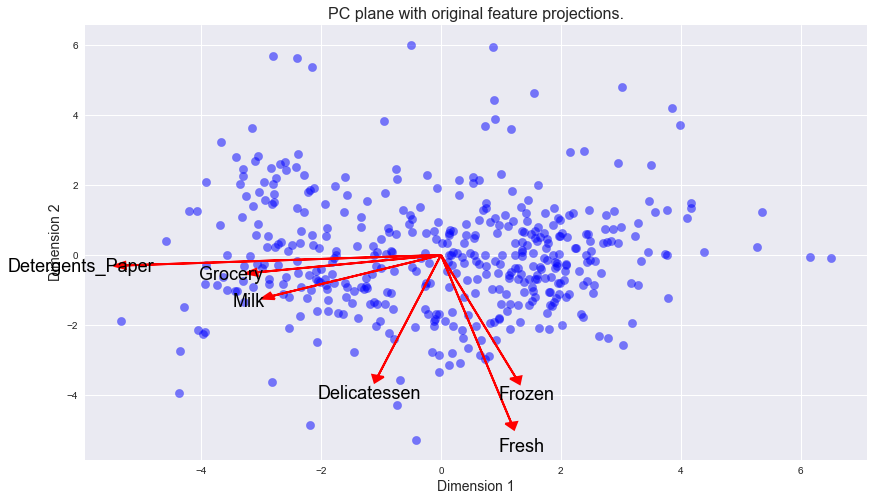

In [80]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

## Clustering

Nesta seção, você irá escolher utilizar entre o algoritmo de clustering K-Means ou o algoritmo de clustering do Modelo de Mistura Gaussiano para identificar as várias segmentações de clientes escondidos nos dados. Então você irá recuperar pontos de dados específicos do cluster para entender seus significados ao transformá-los de volta em suas dimensões e escalas originais. 

### Questão 6
- Quais são as vantagens de utilizar o algoritmo de clustering K-Means?
- Quais são as vantagens de utilizar o algoritmo de clustering do Modelo de Mistura Gaussiano?
- Dadas as suas observações até agora sobre os dados de clientes da distribuidora, qual dos dois algoritmos você irá utilizar e por quê.

**Dica: **Pense na diferença entre os clusters mais próximos ou mais isolados.

**Resposta:**

**K-Means**
- Vantagens: baixo tempo computacional, fácil de interpretar e implementar, comporta-se bem em altas dimensões
- Desvantagens: assume o cluster como esférico, não se comporta bem com data de formatos mais complexos,suscetível a outliers

**Vantagens GMM**
- Vantagens: não há premissas quanto à geometria do cluster, não envieza o tamanho do cluster para estruturas específicas, pontos podem pertencer a mais de um cluster
- Desvantagens: problemas com dados de altas dimensões, difícil de interpretar

**Algoritmo escolhido**: Optou-se pelo Kmeans pela sua simplicidade e facilidade de interpretação. Quando a sua sensibilidade aos outliers, estes já foram removidos anteriormente.

### Implementação: Criando Clusters
Dependendo do problema, o número de clusters que você espera que estejam nos dados podem já ser conhecidos. Quando um número de clusters não é conhecido *a priori*, não há garantia que um dado número de clusters melhor segmenta os dados, já que não é claro quais estruturas existem nos dados – se existem. Entretanto, podemos quantificar a "eficiência" de um clustering ao calcular o *coeficiente de silhueta* de cada ponto de dados. O [coeficiente de silhueta](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) para um ponto de dado mede quão similar ele é do seu cluster atribuído, de -1 (não similar) a 1 (similar). Calcular a *média* do coeficiente de silhueta fornece um método de pontuação simples de um dado clustering.

No bloco de código abaixo, você vai precisar implementar o seguinte:
 - Ajustar um algoritmo de clustering para o `reduced_data` e atribui-lo ao `clusterer`.
 - Prever o cluster para cada ponto de dado no `reduced_data` utilizando o `clusterer.predict` e atribuindo eles ao `preds`.
 - Encontrar os centros do cluster utilizando o atributo respectivo do algoritmo e atribuindo eles ao `centers`.
 - Prever o cluster para cada amostra de pontos de dado no `pca_samples` e atribuindo eles ao `sample_preds`.
 - Importar sklearn.metrics.silhouette_score e calcular o coeficiente de silhueta do `reduced_data` contra o do `preds`.
   - Atribuir o coeficiente de silhueta para o `score` e imprimir o resultado.

In [89]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# TODO: Calcule a média do coeficiente de silhueta para o número de clusters escolhidos
print('K-MEANS\n')
for n_clusters in range(2,11):
    clusterer_ = KMeans(n_clusters=n_clusters).fit(reduced_data)
    preds_ = clusterer_.fit_predict(reduced_data)
    centers_ = clusterer_.cluster_centers_

    score = silhouette_score (reduced_data, preds_)
    print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

K-MEANS

For n_clusters = 2, silhouette score is 0.42628101546910846
For n_clusters = 3, silhouette score is 0.39640192996232043
For n_clusters = 4, silhouette score is 0.33293041968141934
For n_clusters = 5, silhouette score is 0.34999779752629756
For n_clusters = 6, silhouette score is 0.3655171052587634
For n_clusters = 7, silhouette score is 0.36350322430458637
For n_clusters = 8, silhouette score is 0.3541282054457816
For n_clusters = 9, silhouette score is 0.3635364657978106
For n_clusters = 10, silhouette score is 0.3473160434808592


### Questão 7
- Reporte o coeficiente de silhueta para vários números de cluster que você tentou.
- Dentre eles, qual a quantidade de clusters que tem a melhor pontuação de silhueta?

**Resposta:** O maior pontuação atingida (0.43) ocorreu para 2 clusters.

### Visualização de Cluster
Uma vez que você escolheu o número ótimo de clusters para seu algoritmo de clustering utilizando o método de pontuação acima, agora você pode visualizar os resultados ao executar o bloco de código abaixo. Note que, para propósitos de experimentação, é de bom tom que você ajuste o número de clusters para o seu algoritmo de cluster para ver várias visualizações. A visualização final fornecida deve, entretanto, corresponder com o número ótimo de clusters. 

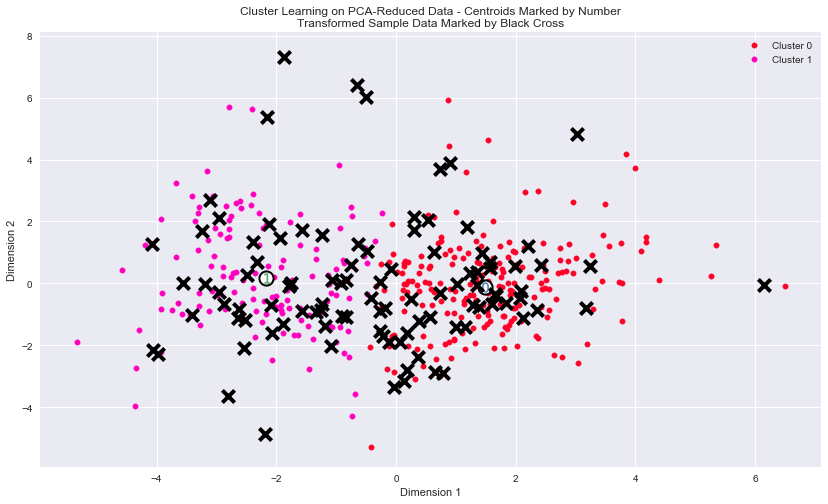

In [91]:
# Mostre os resultados do clustering da implementação
# TODO: Aplique o algoritmo de clustering de sua escolha aos dados reduzidos 
from sklearn.cluster import KMeans
clusterer = KMeans (n_clusters=2)
clusterer.fit(reduced_data)

# TODO: Preveja o cluster para cada ponto de dado
preds = clusterer.predict(reduced_data)

# TODO: Ache os centros do cluster
centers = clusterer.cluster_centers_

# TODO: Preveja o cluster para cada amostra de pontos de dado transformados
sample_preds = clusterer.predict(pca_samples)
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementação: Recuperação de Dados
Cada cluster apresentado na visualização acima tem um ponto central. Esses centros (ou médias) não são especificamente pontos de dados não específicos dos dados, em vez disso, são *as médias* de todos os pontos estimados em seus respectivos clusters. Para o problema de criar segmentações de clientes, o ponto central do cluster corresponde *a média dos clientes daquele segmento*. Já que os dados foram atualmente reduzidos em dimensões e escalas por um algoritmo, nós podemos recuperar a despesa representativa do cliente desses pontos de dados ao aplicar transformações inversas.

No bloco de código abaixo, você vai precisar implementar o seguinte:
 - Aplicar a transformação inversa para o `centers` utilizando o `pca.inverse_transform`, e atribuir novos centros para o `log_centers`.
 - Aplicar a função inversa do `np.log` para o `log_centers` utilizando `np.exp`, e atribuir os verdadeiros centros para o `true_centers`.


In [ ]:
# TODO: Transforme inversamento os centros
log_centers = None

# TODO: Exponencie os centros
true_centers = None

# Mostre os verdadeiros centros
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

### Questão 8
- Considere o gasto total de compra de cada categoria de produto para os pontos de dados representativos acima e reporte a descrição estatística do conjunto de dados no começo do projeto. Qual conjunto de estabelecimentos cada segmentação de clientes representa?

**Dica:** Um cliente que é atribuído ao `'Cluster X'` deve se identificar melhor com os estabelecimentos representados pelo conjunto de atributos do `'Segment X'`. Pense no que cada segmento representa em termos do ponto de atributo escolhido.

**Resposta:**

### Questão 9
- Para cada amostra de ponto, qual segmento de cliente da **Questão 8** é melhor representado?
- As previsões para cada amostra de ponto são consistentes com isso?

Execute o bloco de códigos abaixo para saber a previsão de segmento para cada amostra de ponto.

In [ ]:
# Mostre as previsões
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

**Resposta:**

## Conclusão

Nesta seção final, você irá investigar maneiras de fazer uso dos dados que estão em clusters. Primeiro você vai considerar quais são os diferentes grupos de clientes, a **segmentação de clientes**, que pode ser afetada diferentemente por um esquema de entrega específico. Depois, você vai considerar como dar um rótulo para cada cliente (qual *segmento* aquele cliente pertence), podendo fornecer atributos adicionais sobre os dados do cliente. Por último, você vai comparar a **segmentação de clientes** com uma variável escondida nos dados, para ver se o cluster identificou certos tipos de relação.

### Questão 10
Empresas sempre irão executar os [testes A/B](https://en.wikipedia.org/wiki/A/B_testing) ao fazer pequenas mudanças em seus produtos ou serviços para determinar se ao fazer aquela mudança, ela afetará seus clientes de maneira positiva ou negativa. O distribuidor de atacado está considerando mudar seu serviço de entrega de atuais 5 dias por semana para 3 dias na semana. Mas o distribuidor apenas fará essa mudança no sistema de entrega para os clientes que reagirem positivamente.
- Como o distribuidor de atacado pode utilizar a segmentação de clientes para determinar quais clientes, se há algum, que serão alcançados positivamente à mudança no serviço de entrega?

**Dica:** Podemos supor que as mudanças afetam todos os clientes igualmente? Como podemos determinar quais grupos de clientes são os mais afetados?

**Resposta:**

### Questão 11
A estrutura adicional é derivada dos dados não rotulados originalmente quando utilizado as técnicas de clustering. Dado que cada cliente tem um **segmento de cliente** que melhor se identifica (dependendo do algoritmo de clustering aplicado), podemos considerar os *segmentos de cliente* como um **atributo construído (engineered)** para os dados. Assumindo que o distribuidor de atacado adquiriu recentemente dez novos clientes e cada um deles forneceu estimativas dos gastos anuais para cada categoria de produto. Sabendo dessas estimativas, o distribuidor de atacado quer classificar cada novo cliente em uma **segmentação de clientes** para determinar o serviço de entrega mais apropriado.  
- Como o distribuidor de atacado pode rotular os novos clientes utilizando apenas a estimativa de despesas com produtos e os dados de **segmentação de clientes**.

**Dica:** Um aprendiz supervisionado pode ser utilizado para treinar os clientes originais. Qual seria a variável alvo?

**Resposta:**

### Visualizando Distribuições Subjacentes

No começo deste projeto, foi discutido que os atributos `'Channel'` e `'Region'` seriam excluídos do conjunto de dados, então as categorias de produtos do cliente seriam enfatizadas na análise. Ao reintroduzir o atributo `'Channel'` ao conjunto de dados, uma estrutura interessante surge quando consideramos a mesma redução de dimensionalidade da PCA aplicada anteriormente no conjunto de dados original.

Execute o código abaixo para qual ponto de dados é rotulado como`'HoReCa'` (Hotel/Restaurante/Café) ou o espaço reduzido `'Retail'`. Al´´em disso, você vai encontrar as amostras de pontos circuladas no corpo, que identificará seu rótulo.

In [ ]:
# Mostre os resultados do clustering baseado nos dados do 'Channel'
vs.channel_results(reduced_data, outliers, pca_samples)

### Questão 12
- Quão bom é o algoritmo de clustering e o números de clusters que você escolheu comparado a essa distribuição subjacente de clientes de Hotel/Restaurante/Café a um cliente Varejista?
- Há segmentos de clientes que podem ser classificados puramente como 'Varejistas' ou 'Hotéis/Restaurantes/Cafés' nessa distribuição?
- Você consideraria essas classificações como consistentes comparada a sua definição de segmentação de clientes anterior?*

**Resposta:**

> **Nota**: Uma vez que você completou todas as implementações de código e respondeu todas as questões acima com êxito, você pode finalizar seu trabalho exportando um iPython Notebook como um documento HTML. Você pode fazer isso utilizando o menu acima e navegando até  
**File -> Download as -> HTML (.html)**. Inclua o documento finalizado junto com esse Notebook para o seu envio.